<a href="https://colab.research.google.com/github/AshaMariam/Case-Study-on-Regression/blob/main/Asha_Mariam_Regression_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study on Regression**

The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.

Find the best linear relationship between year and
price.

Can you predict the possible price of a 2022 model second-hand grand i10?

Please learn about lasso regression and create a model along with linear regression.

Find out which one is performing better.

Dataset used : car_age_price.csv

In [309]:
import pandas as pd
import numpy as np

In [310]:
import warnings
warnings.filterwarnings('ignore')

In [311]:
#Load the dataset
df = pd.read_csv('/content/car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [312]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [313]:
#To display the name of columns
df.columns

Index(['Year', 'Price'], dtype='object')

In [314]:
#To display the dataset statistics
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [315]:
#Check for missing values
df.isnull().sum()

Year     0
Price    0
dtype: int64

In [316]:
#Visualize the relationship between year and price
import seaborn as sns
import matplotlib.pyplot as plt

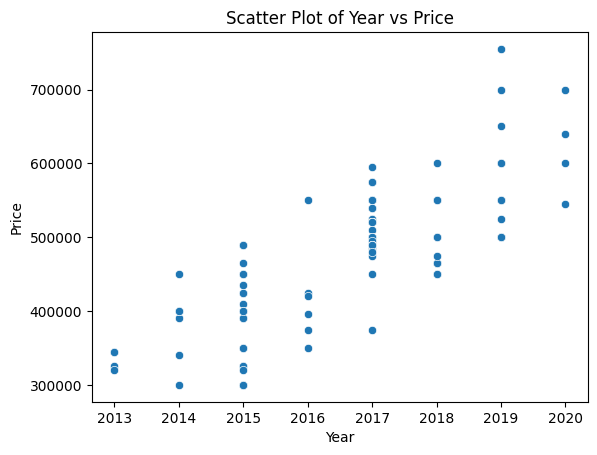

In [317]:
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Scatter Plot of Year vs Price')
plt.show()

In [318]:
#Seperating the dataset into features (X) and label (y)
X= df[['Year']]
y= df['Price']


**Linear Regression**

In [319]:
#Dividing the dataset into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [320]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(78, 1)
(34, 1)
(78,)
(34,)


In [321]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()
# Train the model on the training set
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([627270.95081529, 365505.8040631 , 452760.85298049, 409133.32852179,
       583643.4263566 , 496388.37743919, 496388.37743919, 496388.37743919,
       496388.37743919, 540015.90189789, 496388.37743919, 409133.32852179,
       321878.27960439, 496388.37743919, 496388.37743919, 540015.90189789,
       496388.37743919, 627270.95081529, 321878.27960439, 496388.37743919,
       321878.27960439, 496388.37743919, 409133.32852179, 496388.37743919,
       540015.90189789, 409133.32852179, 496388.37743919, 496388.37743919,
       409133.32852179, 409133.32852179, 496388.37743919, 496388.37743919,
       496388.37743919, 409133.32852179])

In [322]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 36169.839819489156


In [323]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1891386748.9417279


In [324]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 43490.08


In [325]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

R^2 Score: 0.75


Mean Absolute Error: 36169.839819489156

Mean Squared Error: 1891386748.9417279

RMSE: 43490.08

R^2 Score: 0.75

**Possible price of a 2022 model second-hand grand i10**

In [326]:
#Predicted price for 2022 Model car
#Predict price using linear regression
predicted_price_2022_linear = model.predict([[2022]])
print(f'Predicted Price for a 2022 model: {predicted_price_2022_linear[0]}')

Predicted Price for a 2022 model: 714525.999732703


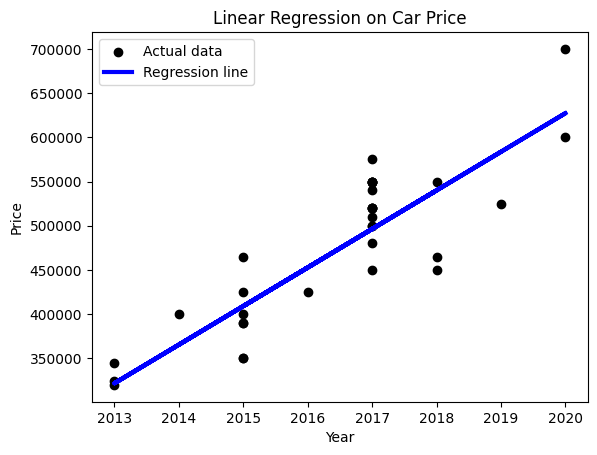

In [327]:
#Plotting the original data and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression on Car Price')
plt.legend()
plt.show()

**Lasso Regression**

LASSO stands for Least Absolute Shrinkage and Selection Operator.

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions.

To create a Lasso model : lasso_model_name = Lasso(alpha=1.0)(Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation.)

In [328]:
#Dividing the dataset into test and train data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.3, random_state=3)

In [329]:
from sklearn.linear_model import Lasso

# Create and fit the Lasso regression model
la_model = Lasso(alpha=0.05)
la_model.fit(X_train1, y_train1)


Lasso(alpha=0.05)

In [330]:
# Make predictions on the test set
y_pred_la = la_model.predict(X_test1)
y_pred_la

array([627270.88513768, 365505.86035821, 452760.86861803, 409133.36448811,
       583643.38100776, 496388.37274794, 496388.37274794, 496388.37274794,
       496388.37274794, 540015.87687784, 496388.37274794, 409133.36448811,
       321878.35622829, 496388.37274794, 496388.37274794, 540015.87687784,
       496388.37274794, 627270.88513768, 321878.35622829, 496388.37274794,
       321878.35622829, 496388.37274794, 409133.36448811, 496388.37274794,
       540015.87687784, 409133.36448811, 496388.37274794, 496388.37274794,
       409133.36448811, 409133.36448811, 496388.37274794, 496388.37274794,
       496388.37274794, 409133.36448811])

In [331]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error

mae_la = mean_absolute_error(y_test1, y_pred_la)
print(f'Mean Absolute Error: {mae_la}')

Mean Absolute Error: 36169.83912959257


In [332]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

mse_la = mean_squared_error(y_test1, y_pred_la)
print(f'Mean Squared Error: {mse_la}')

Mean Squared Error: 1891386662.344005


In [333]:
rmse_la = np.sqrt(mean_squared_error(y_test1, y_pred_la))
print(f'RMSE: {rmse_la:.2f}')

RMSE: 43490.08


In [334]:
from sklearn.metrics import r2_score

r2_la = r2_score(y_test1, y_pred_la)
print(f'R^2 Score: {r2_la:.2f}')

R^2 Score: 0.75


Mean Absolute Error: 36169.83912959257

Mean Squared Error: 1891386662.344005

RMSE: 43490.08

R^2 Score: 0.75

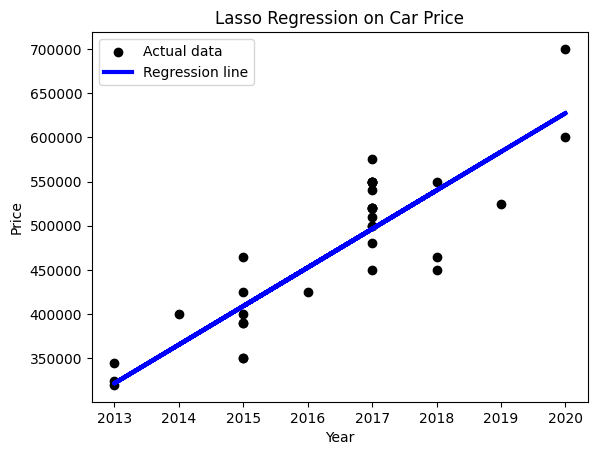

In [335]:
#Plotting the original data and the regression line
plt.scatter(X_test1, y_test1, color='black', label='Actual data')
plt.plot(X_test1, y_pred_la, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression on Car Price')
plt.legend()
plt.show()

**Possible price of a 2022 model second-hand grand i10**

In [336]:
#Predicted price for 2022 Model car
#Predict price using Lasso regression
predicted_price_2022_lasso = la_model.predict([[2022]])
print(f'Predicted Price for a 2022 model_lasso: {predicted_price_2022_lasso[0]}')

Predicted Price for a 2022 model_lasso: 714525.8933974952


**Conclusion**

**Linear Regression**

Mean Absolute Error: 36169.839819489156

Mean Squared Error: 1891386748.9417279

RMSE: 43490.08

R^2 Score: 0.75

Predicted Price for a 2022 model car: 714525.999732703

**Lasso Regression**

Mean Absolute Error: 36169.83912959257

Mean Squared Error: 1891386662.344005

RMSE: 43490.08

R^2 Score: 0.75

Predicted Price for a 2022 model_car: 714525.9784656614

By evaluating both linear regression and lasso regression performs similarly. So it is difficult to determine which model is better. But if each value may see a micro difference between MAE and MSE, by considering that Lasso regression has a lesser value. From that we can assume Lasso regression is better.